In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
from google.colab import drive 
drive.mount('/content/drive/')

import os
os.chdir("/content/drive/MyDrive/datax")
!ls

Mounted at /content/drive/
01_reviews_filtering.ipynb  example.csv		  rest_good_bad_review.csv
austin_review.csv	    labeled		  rest_with_good_bad_review.csv
df_revid_star_4.xlsx	    Model_v05_summ.ipynb  sum_review_bus.csv


In [3]:
rev = pd.read_csv("austin_review.csv")

In [4]:
rev.columns

Index(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny',
       'cool', 'text', 'date'],
      dtype='object')

In [ ]:
rev.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,GDgXjXSZCA1iNQWD7OHXfg,1RCRKuHgP3FskGUVnmFdxg,mOnesB4IF9j6-ZmHoOHOig,4.0,0,0,0,I think their rice dishes are way better than ...,2017-05-26 03:05:46
1,GgWFjRHhelaiUgR2-H6N4g,pRPT3vqhqpU7kHgmKJamvw,-_GnwXmzC3DXsHR9nyaC2g,3.0,0,0,0,3.5 stars! I got the avocado margarita and it ...,2012-11-06 07:09:57
2,yXKu-60gP_378PX0xzyHHg,uUrXZ2guG27PQUeR6u8K3w,WtDOs3a6k_oPJmwiDh4qBQ,2.0,3,1,2,"I wanted this to be a great place, but I wasn'...",2009-02-28 22:47:35
3,PqjcouPGridrxYB5xrYX4Q,rb8O5KymPpxL3D43B_7sQw,g3pXGPRKYd_WQxLT2IFPxQ,1.0,0,0,0,I just got done with lunch here. It has been o...,2017-11-06 19:27:53
4,z-6ElnK3yXpn2oNKR7NYtw,OSsqq7CzBdAbF7E6kZHd0g,bZiIIUcpgxh8mpKMDhdqbA,3.0,0,0,0,My husband and I shared the parmesan truffly f...,2017-10-11 00:25:47


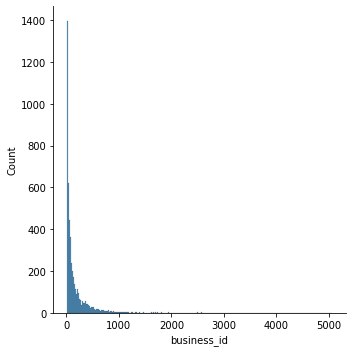

In [ ]:
ax = sns.displot(rev.business_id.value_counts())

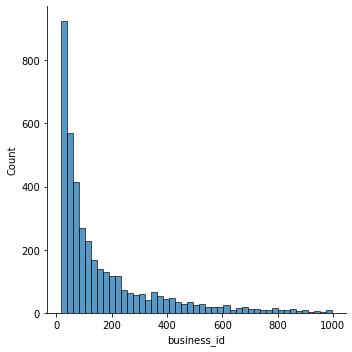

In [ ]:
sns.displot(rev.business_id.value_counts()[(rev.business_id.value_counts() <= 1000) & (rev.business_id.value_counts() >= 15)])

In [7]:
((rev.business_id.value_counts() >= 10).sum()) / (rev.business_id.nunique())

0.8944713478611783

In [8]:
((rev.business_id.value_counts() >= 800).sum()) / (rev.business_id.nunique())

0.030468119451170297

In [9]:
df_rev_count = rev.groupby('business_id').agg({'review_id':'count'}).reset_index()

In [10]:
df_rev_count['rev_count_bracket']=np.where(df_rev_count['review_id']<=20,'a.1. 0_20',
                                           np.where(df_rev_count['review_id']<=100,'a.2. 20_100',
                                              np.where(df_rev_count['review_id']<=500,'b. 100_500',
                                                      np.where(df_rev_count['review_id']<=1000,'c. 500_1000',
                                                              np.where(df_rev_count['review_id']<=2000,'d. 1000_2000',
                                                                        np.where(df_rev_count['review_id']<=5000,'e. 2000_5000','f. 5000+'))))))

In [11]:
df=df_rev_count.groupby('rev_count_bracket').agg({'business_id':'nunique'}).reset_index()
df['perc']=round(100*df['business_id']/df_rev_count.business_id.nunique(),2)
df

,rev_count_bracket,business_id,perc
0,a.1. 0_20,1216,24.54
1,a.2. 20_100,1839,37.11
2,b. 100_500,1528,30.83
3,c. 500_1000,287,5.79
4,d. 1000_2000,72,1.45
5,e. 2000_5000,13,0.26
6,f. 5000+,1,0.02


In [12]:
## Select resturants that has more than 10 reviews and less than 500 reviews
df_filtered_bid = df_rev_count[(df_rev_count.review_id>=15) & (df_rev_count.review_id<=500)]['business_id']
rev_filtered_df = rev[rev.business_id.isin(df_filtered_bid)]

In [15]:
sample_rev_for_labeling = rev_filtered_df.sample(1000, random_state=1000)[["review_id", "user_id", "business_id", "text", "stars"]]

In [16]:
sample_rev_for_labeling['expensive'] = 0
sample_rev_for_labeling['bad_customer_service'] = 0
sample_rev_for_labeling['small_portion_size'] = 0
sample_rev_for_labeling['poor_ambience'] = 0
sample_rev_for_labeling['bad_food_taste'] = 0

In [17]:
sample_rev_for_labeling.to_excel("sample_rev_for_labeling.xlsx", index=False)

In [ ]:
sample_rev_for_labeling_1 = sample_rev_for_labeling.iloc[:200]
sample_rev_for_labeling_2 = sample_rev_for_labeling.iloc[200:400]
sample_rev_for_labeling_3 = sample_rev_for_labeling.iloc[400:600]
sample_rev_for_labeling_4 = sample_rev_for_labeling.iloc[600:800]
sample_rev_for_labeling_5 = sample_rev_for_labeling.iloc[800:1000]

In [ ]:
sample_rev_for_labeling_1.to_excel("sample_rev_for_labeling_1.xlsx", index=False)
sample_rev_for_labeling_2.to_excel("sample_rev_for_labeling_2.xlsx", index=False)
sample_rev_for_labeling_3.to_excel("sample_rev_for_labeling_3.xlsx", index=False)
sample_rev_for_labeling_4.to_excel("sample_rev_for_labeling_4.xlsx", index=False)
sample_rev_for_labeling_5.to_excel("sample_rev_for_labeling_5.xlsx", index=False)

In [ ]:
df_revid_star_3 = rev_filtered_df[rev_filtered_df.review_id.isin(sample_rev_for_labeling_3.review_id)][["review_id", "stars"]]
# df_revid_star_3.review_id.nunique(), len(df_revid_star_3)

In [ ]:
# df_revid_star_3.to_excel("df_revid_star_3.xlsx", index=False)

In [ ]:
df_revid_star_4 = rev_filtered_df[rev_filtered_df.review_id.isin(sample_rev_for_labeling_4.review_id)][["review_id", "stars"]]
df_revid_star_4.to_excel("df_revid_star_4.xlsx", index=False)